
K = 1
Accuracy: 0.9814814814814815
Confusion Matrix:
 [[13  0  0]
 [ 0 23  1]
 [ 0  0 17]]

K = 3
Accuracy: 0.9629629629629629
Confusion Matrix:
 [[13  0  0]
 [ 2 22  0]
 [ 0  0 17]]

K = 5
Accuracy: 0.9444444444444444
Confusion Matrix:
 [[13  0  0]
 [ 2 22  0]
 [ 0  1 16]]

K = 7
Accuracy: 0.9444444444444444
Confusion Matrix:
 [[13  0  0]
 [ 2 22  0]
 [ 0  1 16]]

K = 9
Accuracy: 0.9629629629629629
Confusion Matrix:
 [[13  0  0]
 [ 2 22  0]
 [ 0  0 17]]


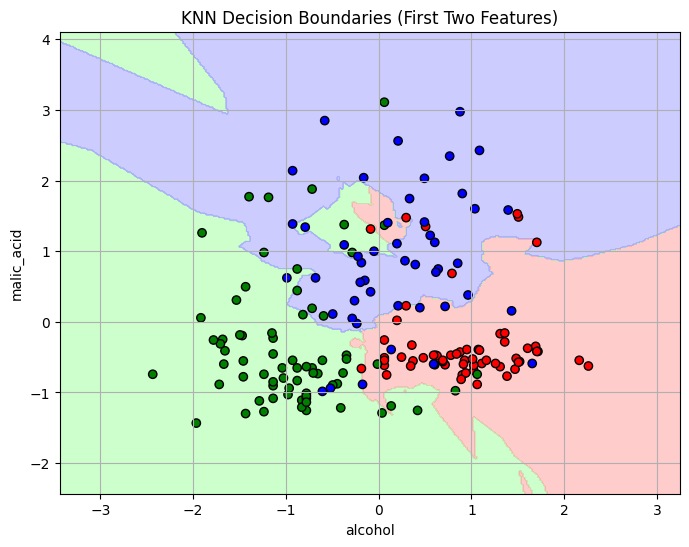

In [1]:
# Task 6: K-Nearest Neighbors (KNN) Classification

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

# Load classification dataset
dataset = load_wine()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.Series(dataset.target)

# Normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=7)

# Trying different K values
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print(f"\nK = {k}")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

# Plotting decision boundaries (only for first 2 features to visualize in 2D)
X_vis = X_scaled[:, :2]
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y, test_size=0.3, random_state=7)

model_vis = KNeighborsClassifier(n_neighbors=5)
model_vis.fit(X_train_v, y_train_v)

# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for mesh points
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision surface
plt.figure(figsize=(8, 6))
colors = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=colors, alpha=0.6)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['red', 'green', 'blue']))
plt.title("KNN Decision Boundaries (First Two Features)")
plt.xlabel(dataset.feature_names[0])
plt.ylabel(dataset.feature_names[1])
plt.grid(True)
plt.show()
